## Task 1

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch

vocab_size = 10000
max_length = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=max_length, padding="post")
x_test = pad_sequences(x_test, maxlen=max_length, padding="post")

word_index = imdb.get_word_index()
reverse_word_index = {index: word for word, index in word_index.items()}

def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(idx - 3, "[UNK]") for idx in encoded_review])  # Adjusting index offset

train_texts = [decode_review(seq) for seq in x_train[:500]]
test_texts = [decode_review(seq) for seq in x_test[:500]]

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

def build_rnn_model(vocab_size, max_length):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
        SimpleRNN(64, return_sequences=True),
        Dropout(0.3),
        SimpleRNN(64),
        Dropout(0.3),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

rnn_model = build_rnn_model(vocab_size, max_length)

rnn_model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))
rnn_accuracy = rnn_model.evaluate(x_test, y_test)[1]

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 161ms/step - accuracy: 0.5349 - loss: 0.6824 - val_accuracy: 0.7250 - val_loss: 0.5346
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 35s 133ms/step - accuracy: 0.8168 - loss: 0.4234 - val_accuracy: 0.8328 - val_loss: 0.3830
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.8809 - loss: 0.3119 - val_accuracy: 0.7876 - val_loss: 0.4962
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.8871 - loss: 0.3015 - val_accuracy: 0.8056 - val_loss: 0.4891
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 132ms/step - accuracy: 0.9409 - loss: 0.1719 - val_accuracy: 0.8180 - val_loss: 0.5514
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8168 - loss: 0.5568


In [24]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import time

start_time = time.time()
train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, y_train[:500], test_size=0.2, random_state=42)

model_name = "textattack/bert-base-uncased-imdb"
model = BertForSequenceClassification.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

train_inputs = tokenizer(train_texts, padding=True, truncation=True, max_length=max_length, return_tensors="pt")
test_inputs = tokenizer(test_texts, padding=True, truncation=True, max_length=max_length, return_tensors="pt")

model.eval()
with torch.no_grad():
    test_outputs = model(test_inputs["input_ids"], attention_mask=test_inputs["attention_mask"]).logits

test_predictions = torch.argmax(test_outputs, dim=1).numpy()
test_accuracy = np.mean(test_predictions == test_labels)

prebert_total_time = time.time() - start_time
print(f"\nTotal execution time: {prebert_total_time:.2f} seconds")
print("Pretrained BERT Model Accuracy on IMDB")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"\nTotal execution time: {prebert_total_time:.2f} seconds")


Total execution time: 37.54 seconds
Pretrained BERT Model Accuracy on IMDB
Test Accuracy: 0.9200

Total execution time: 37.54 seconds


In [27]:
import numpy as np

print("Comparison Report")
print(f"RNN Model - Accuracy: {rnn_accuracy:.4f}")
print(f"BERT Model - Accuracy: {test_accuracy:.4f}")

Comparison Report
RNN Model - Accuracy: 0.8180
BERT Model - Accuracy: 0.9200


## Task 2

Attention Weights:
 [[0.23659291 0.2696631  0.29826426 0.19547973]
 [0.23422884 0.2713456  0.30458975 0.1898358 ]
 [0.23407641 0.27035108 0.30376501 0.1918075 ]
 [0.24285656 0.26203409 0.27780069 0.21730866]]
Attention Output:
 [[0.48821023 0.85938626]
 [0.49252486 0.86101205]
 [0.49161431 0.860281  ]
 [0.4732588  0.85262907]]


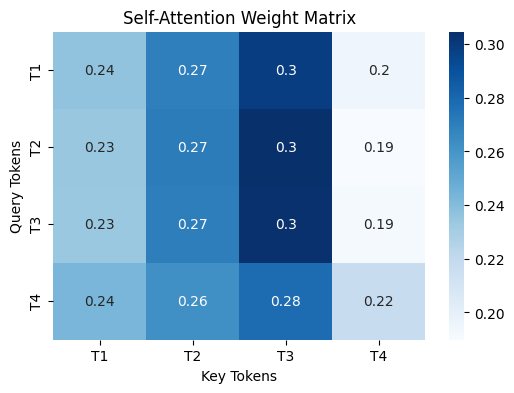

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

input_embeddings = np.array([
    [1.0, 0.2],
    [0.8, 0.5],
    [0.3, 0.9],
    [0.6, 0.1]
])

d_model = input_embeddings.shape[1]
W_q = np.random.rand(d_model, d_model)
W_k = np.random.rand(d_model, d_model)
W_v = np.random.rand(d_model, d_model)

queries = np.dot(input_embeddings, W_q)
keys = np.dot(input_embeddings, W_k)
values = np.dot(input_embeddings, W_v)

attention_scores = np.dot(queries, keys.T) / np.sqrt(d_model)
attention_weights = np.exp(attention_scores) / np.sum(np.exp(attention_scores), axis=1, keepdims=True)
attention_output = np.dot(attention_weights, values)

print("Attention Weights:\n", attention_weights)
print("Attention Output:\n", attention_output)

plt.figure(figsize=(6, 4))
sns.heatmap(attention_weights, annot=True, cmap="Blues", xticklabels=['T1', 'T2', 'T3', 'T4'], yticklabels=['T1', 'T2', 'T3', 'T4'])
plt.title("Self-Attention Weight Matrix")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.show()

## Task 3

In [16]:
import torch
from transformers import BertTokenizer, BertModel
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import time

vocab_size = 10000
max_length = 128
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

x_train = pad_sequences(x_train, maxlen=max_length, padding="post")
x_test = pad_sequences(x_test, maxlen=max_length, padding="post")

word_index = imdb.get_word_index()
reverse_word_index = {index: word for word, index in word_index.items()}
def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(idx - 3, "[UNK]") for idx in encoded_review])

train_texts = [decode_review(seq) for seq in x_train[:500]]
test_texts = [decode_review(seq) for seq in x_test[:500]]

train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, y_train[:500], test_size=0.2, random_state=42)

start_time = time.time()
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name)

train_inputs = tokenizer(train_texts, padding=True, truncation=True, max_length=max_length, return_tensors="pt")
test_inputs = tokenizer(test_texts, padding=True, truncation=True, max_length=max_length, return_tensors="pt")

with torch.no_grad():
    train_outputs = bert_model(train_inputs["input_ids"], attention_mask=train_inputs["attention_mask"]).last_hidden_state
    test_outputs = bert_model(test_inputs["input_ids"], attention_mask=test_inputs["attention_mask"]).last_hidden_state

train_features = train_outputs[:, 0, :].numpy()
test_features = test_outputs[:, 0, :].numpy()

classifier = Sequential([
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

classifier.fit(train_features, train_labels, epochs=5, batch_size=32, validation_data=(test_features, test_labels))
bert_accuracy = classifier.evaluate(test_features, test_labels)[1]
bert_total_time = time.time() - start_time
print("Standard BERT Model Accuracy")
print(f"Test Accuracy: {bert_accuracy:.4f}")
print(f"\nTotal execution time: {bert_total_time:.2f} seconds")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5372 - loss: 0.6898 - val_accuracy: 0.6800 - val_loss: 0.6415
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5862 - loss: 0.6601 - val_accuracy: 0.7100 - val_loss: 0.5988
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7096 - loss: 0.5671 - val_accuracy: 0.7600 - val_loss: 0.5370
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7656 - loss: 0.5103 - val_accuracy: 0.7600 - val_loss: 0.5054
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7587 - loss: 0.4781 - val_accuracy: 0.8100 - val_loss: 0.4751
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7719 - loss: 0.5052
Standard BERT Model Accuracy
Test Accuracy: 0.8100

Total execution time: 256.56 seconds


## Task 4

### Bert model is taken from Task 3

In [18]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
import time

start_time = time.time()

with open("shakespeare.txt", "r", encoding="utf-8") as file:
    text = file.read()

text = text[:100000]

texts = [text[i:i+1000] for i in range(0, len(text), 1000)]
train_texts, val_texts = train_test_split(texts, test_size=0.2, random_state=42)

model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
gpt_model = GPT2LMHeadModel.from_pretrained(model_name)

max_length = 100
train_inputs = tokenizer(train_texts, padding="max_length", truncation=True, max_length=max_length, return_tensors="pt")
val_inputs = tokenizer(val_texts, padding="max_length", truncation=True, max_length=max_length, return_tensors="pt")

train_labels = train_inputs["input_ids"].clone()
val_labels = val_inputs["input_ids"].clone()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gpt_model.to(device)

optimizer = torch.optim.Adam(gpt_model.parameters(), lr=5e-5)

batch_size = 8
epochs = 10

for epoch in range(epochs):
    gpt_model.train()
    total_loss = 0

    for i in range(0, len(train_texts), batch_size):
        batch_inputs = {k: v[i:i+batch_size].to(device) for k, v in train_inputs.items()}
        batch_labels = train_labels[i:i+batch_size].to(device)

        optimizer.zero_grad()
        outputs = gpt_model(**batch_inputs, labels=batch_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_texts):.4f}")

gpt_model.eval()
seed_text = "I must not think"
input_ids = tokenizer.encode(seed_text, return_tensors="pt").to(device)

with torch.no_grad():
    output = gpt_model.generate(
        input_ids,
        max_length=100,
        num_return_sequences=1,
        temperature=0.7,
        pad_token_id=tokenizer.eos_token_id
    )

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print("Generated Text:")
print(generated_text)

gpt_total_time = time.time() - start_time
print(f"\nTotal execution time: {gpt_total_time:.2f} seconds")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Epoch 1, Loss: 0.5340
Epoch 2, Loss: 0.4673
Epoch 3, Loss: 0.4326
Epoch 4, Loss: 0.4066
Epoch 5, Loss: 0.3831
Epoch 6, Loss: 0.3607
Epoch 7, Loss: 0.3423
Epoch 8, Loss: 0.3229
Epoch 9, Loss: 0.3023


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Epoch 10, Loss: 0.2853
Generated Text:
I must not think of thee,
  But I must think of thee, and I must live,
  And love thee dearly, and be loved by thee.


                             57
  O thou so lovely a goddess,
  That beauty so well-used,
  That beauty so well-used,
  Makes me blush, and cry

Total execution time: 1415.61 seconds


In [19]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
import time

start_time = time.time()

model_name = "t5-large"
tokenizer = T5Tokenizer.from_pretrained(model_name)
t5_model = T5ForConditionalGeneration.from_pretrained(model_name)

sample_texts = [
    "translate from English to Russian: Hello world",
    "translate from Italian to English: Arrivederci Mi Amore!",
    "summarize: Natural language processing is a relatively new field of data science that involves artificial intelligence driven human language analysis by computer. One of the major  areas of NLP is sentimental analysis that allows the extraction of the emotional context of text in order to give machines a chance to understand human language more accurately. As a result of this understanding, machines can generate responsive text based on most commonly used words in input dataset or even create new stories seemingly appearing as the original author’s work. Using NLP and Deep Learning in combination can allow creation of even more progressive models that are capable of understanding and generating text that is close to normal human language.",
]

for text in sample_texts:
    input_text = text if text.startswith("translate") or text.startswith("summarize") else f"translate: {text}"
    inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)

    outputs = t5_model.generate(
        inputs.input_ids,
        max_length=100,
        num_beams=4,
        early_stopping=True,
        no_repeat_ngram_size=2
    )

    print(f"\nInput: {text}")
    print("Output:", tokenizer.decode(outputs[0], skip_special_tokens=True))

t5_total_time = time.time() - start_time
print(f"\nTotal execution time: {t5_total_time:.2f} seconds")


Input: translate from English to Russian: Hello world
Output: Hallo Welt

Input: translate from Italian to English: Arrivederci Mi Amore!
Output: Arrivederci Mi Amore!

Input: summarize: Natural language processing is a relatively new field of data science that involves artificial intelligence driven human language analysis by computer. One of the major  areas of NLP is sentimental analysis that allows the extraction of the emotional context of text in order to give machines a chance to understand human language more accurately. As a result of this understanding, machines can generate responsive text based on most commonly used words in input dataset or even create new stories seemingly appearing as the original author’s work. Using NLP and Deep Learning in combination can allow creation of even more progressive models that are capable of understanding and generating text that is close to normal human language.
Output: natural language processing (nlp) is a relatively new field of dat

In [20]:
print("Comparison of BERT, GPT, and T5 Models")

print("DistilBERT Model Performance")
print(f"Accuracy: {bert_accuracy:.4f}")
print(f"Training Time: {bert_total_time:.2f} sec")

print(f"\nGPT Model - Text Generation")
print(f"Generated Text: {generated_text[:100]}...")
print(f"Training Time: {gpt_total_time:.2f} sec")

print(f"\nT5 Model - Translation")
print(f"Generated Text: {tokenizer.decode(outputs[0], skip_special_tokens=True)[:100]}...")
print(f"Training Time: {t5_total_time:.2f} sec")

Comparison of BERT, GPT, and T5 Models
DistilBERT Model Performance
Accuracy: 0.8100
Training Time: 256.56 sec

GPT Model - Text Generation
Generated Text: I must not think of thee,
  But I must think of thee, and I must live,
  And love thee dearly, and b...
Training Time: 1415.61 sec

T5 Model - Translation
Generated Text: natural language processing (nlp) is a relatively new field of data science . it involves artificial...
Training Time: 107.51 sec


## Task 5

In [43]:
from transformers import BertTokenizer, BertForTokenClassification
import torch
import time

start_time = time.time()
text = "KBTU University has room for improvement in providing adequate resources and support to its students."

ner_tokenizer = BertTokenizer.from_pretrained("dslim/bert-base-NER")
ner_model = BertForTokenClassification.from_pretrained("dslim/bert-base-NER")

inputs = ner_tokenizer(text, return_tensors="pt")
with torch.no_grad():
    outputs = ner_model(**inputs)

predictions = torch.argmax(outputs.logits, dim=2)
tokens = ner_tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
labels = [ner_model.config.id2label[p.item()] for p in predictions[0]]

entities = []
current_entity = []
for token, label in zip(tokens, labels):
    if label.startswith("B-"):
        if current_entity:
            entities.append((" ".join(current_entity[1:]), current_entity[0]))
        current_entity = [label[2:], token.replace("##", "")]
    elif label.startswith("I-") and current_entity:
        current_entity.append(token.replace("##", ""))

if current_entity:
    entities.append((" ".join(current_entity[1:]), current_entity[0]))

print(f"\nInput Text: {text}")
print("Identified Entities:")
for entity, label in entities:
    print(f"- {entity} ({label})")

print(f"\nProcessing Time: {time.time() - start_time:.2f}s")

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



Input Text: KBTU University has room for improvement in providing adequate resources and support to its students.
Identified Entities:
- K B TU University (ORG)

Processing Time: 0.86s


In [68]:
import spacy
import time

start_time = time.time()
nlp = spacy.load("en_core_web_sm")
text = "KBTU University has room for improvement in providing adequate resources and support to its students."
doc = nlp(text)

spacy_tokens = [token.text for token in doc]

spacy_sentences = [sent.text for sent in doc.sents]

spacy_entities = [(ent.text, ent.label_) for ent in doc.ents]

print("spaCy Processed Text:")
print("Tokens:", spacy_tokens)
print("Sentences:", spacy_sentences)
print("Entities:", spacy_entities)
print(f"Time: {time.time() - start_time:.2f}s")

spaCy Processed Text:
Tokens: ['KBTU', 'University', 'has', 'room', 'for', 'improvement', 'in', 'providing', 'adequate', 'resources', 'and', 'support', 'to', 'its', 'students', '.']
Sentences: ['KBTU University has room for improvement in providing adequate resources and support to its students.']
Entities: [('KBTU University', 'ORG')]
Time: 0.73s


In [57]:
import spacy
from transformers import pipeline
from sklearn.metrics import classification_report

nlp = spacy.load("en_core_web_sm")
pos_pipeline = pipeline("token-classification", model="vblagoje/bert-english-uncased-finetuned-pos")

text = "KBTU University has room for improvement in providing adequate resources and support to its students."

def get_spacy_tags(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

def get_bert_tags(text):
    results = pos_pipeline(text)
    return [(result['word'], result['entity']) for result in results]

spacy_results = get_spacy_tags(text)
bert_results = get_bert_tags(text)

print("\nspaCy Tag Distribution:")
spacy_tag_counts = {}
for _, tag in spacy_results:
    spacy_tag_counts[tag] = spacy_tag_counts.get(tag, 0) + 1
for tag, count in sorted(spacy_tag_counts.items()):
    print(f"{tag}: {count}")

print("\nBERT Tag Distribution:")
bert_tag_counts = {}
for _, tag in bert_results:
    bert_tag_counts[tag] = bert_tag_counts.get(tag, 0) + 1
for tag, count in sorted(bert_tag_counts.items()):
    print(f"{tag}: {count}")

Some weights of the model checkpoint at vblagoje/bert-english-uncased-finetuned-pos were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu



spaCy Tag Distribution:
ADJ: 1
ADP: 3
CCONJ: 1
NOUN: 5
PRON: 1
PROPN: 2
PUNCT: 1
VERB: 2

BERT Tag Distribution:
ADJ: 1
ADP: 2
CCONJ: 1
NOUN: 5
PRON: 1
PROPN: 3
PUNCT: 1
SCONJ: 1
VERB: 2


In [3]:
import time
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_len = 128

(train_texts, train_labels), (test_texts, test_labels) = imdb.load_data(num_words=max_words)
train_texts = pad_sequences(train_texts, maxlen=max_len, padding='post')
test_texts = pad_sequences(test_texts, maxlen=max_len, padding='post')

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, 50, input_length=max_len),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_texts, train_labels, validation_data=(test_texts, test_labels), epochs=5, batch_size=64)

test_pred = model.predict(test_texts)
test_pred = (test_pred > 0.5).astype(int).flatten()
accuracy = accuracy_score(test_labels, test_pred)
f1 = f1_score(test_labels, test_pred)
cm = confusion_matrix(test_labels, test_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 70s 172ms/step - accuracy: 0.6599 - loss: 0.6004 - val_accuracy: 0.8498 - val_loss: 0.3558
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 77s 160ms/step - accuracy: 0.8731 - loss: 0.3167 - val_accuracy: 0.8485 - val_loss: 0.3562
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 162ms/step - accuracy: 0.8778 - loss: 0.2949 - val_accuracy: 0.8439 - val_loss: 0.3685
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 169ms/step - accuracy: 0.9224 - loss: 0.2093 - val_accuracy: 0.8447 - val_loss: 0.3787
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 166ms/step - accuracy: 0.8754 - loss: 0.2929 - val_accuracy: 0.7076 - val_loss: 0.5553
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step
Accuracy: 0.7076
F1-Score: 0.7157
Confusion Matrix:
[[8492 4008]
 [3301 9199]]


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=./lstm_model.